In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nba
import h5py
from matplotlib.colors import LogNorm
from scipy.linalg import norm


In [4]:
snapshot="/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5"


In [5]:
f = h5py.File(snapshot, 'r')

In [58]:
disk_pos = nba.ios.gadget_reader.read_snap(snap_name=snapshot,
                                           partType='PartType2',
                                           properties='Coordinates')

bulge_pos = nba.ios.gadget_reader.read_snap(snap_name=snapshot,
                                           partType='PartType3',
                                           properties='Coordinates')

* Loading 'Coordinates' of particles types 'PartType2' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Coordinates' of particles types 'PartType3' from snapshot: '/home/ngc/Work/research/data/GC21/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'


In [60]:
xmean = np.mean(disk_pos[:,0])
ymean = np.mean(disk_pos[:,1])
zmean = np.mean(disk_pos[:,2])
print(xmean, ymean, zmean)
disk_com = disk_pos - np.array([xmean, ymean, zmean])
bulge_com = bulge_pos - np.array([xmean, ymean, zmean])


8.861813 42.432297 -10.02739


In [61]:
rdisk = norm(disk_com, axis=1)
rdcut = np.where(rdisk<50)[0]

rbulge = norm(bulge_com, axis=1)
rbcut = np.where(rbulge<50)[0]

In [62]:
#Hh, xh, yh = np.histogram2d(disk_pos[:,1]-42.4, disk_pos[:,2]+35.03, bins=300)
Hedge_on, yedge_on, zedge_on = np.histogram2d(disk_com[rdcut,1], disk_com[rdcut,2], bins=400)
Hface_on, xface_on, yface_on = np.histogram2d(disk_com[rdcut,0], disk_com[rdcut,1], bins=400)
Hbedge_on, yedge_on, zedge_on = np.histogram2d(bulge_com[rbcut,1], bulge_com[rbcut,2], bins=400)
Hbface_on, xface_on, yface_on = np.histogram2d(bulge_com[rbcut,0], bulge_com[rbcut,1], bins=400)


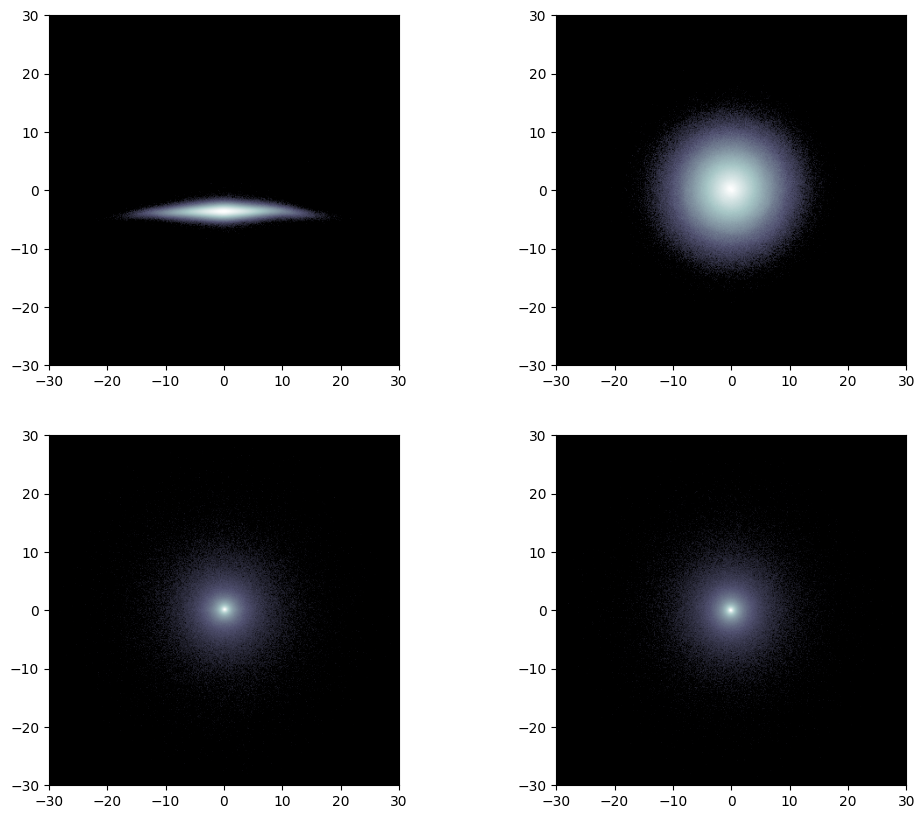

In [64]:

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0][0].imshow(Hedge_on.T, norm=LogNorm(), extent=[-30, 30, -30, 30], cmap='bone')
ax[0][0].set_facecolor('k')
ax[0][0].set_xlim(-30, 30)
ax[0][0].set_ylim(-30, 30)

ax[0][1].imshow(Hface_on.T, norm=LogNorm(), extent=[-30, 30, -30, 30], cmap='bone')
ax[0][1].set_facecolor('k')
ax[0][1].set_xlim(-30, 30)
ax[0][1].set_ylim(-30, 30)

ax[1][0].imshow(Hbedge_on.T, norm=LogNorm(), extent=[-30, 30, -30, 30], cmap='bone')
ax[1][0].set_facecolor('k')
ax[1][0].set_xlim(-30, 30)
ax[1][0].set_ylim(-30, 30)

ax[1][1].imshow(Hbface_on.T, norm=LogNorm(), extent=[-30, 30, -30, 30], cmap='bone')
ax[1][1].set_facecolor('k')
ax[1][1].set_xlim(-30, 30)
ax[1][1].set_ylim(-30, 30)


plt.show()

In [49]:
disk_kin = nba.kinematics.Kinematics(pos=np.array(disk_com), vel=np.ones_like(np.array(disk_pos)))

In [50]:
ldisk, bdisk = disk_kin.pos_cartesian_to_galactic()

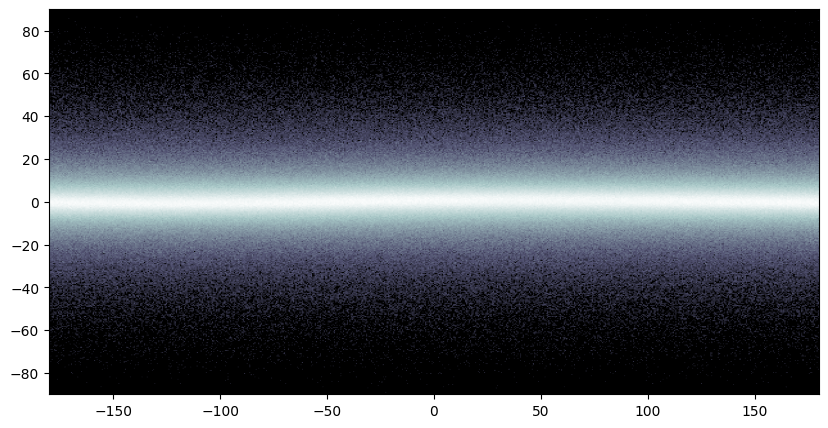

In [56]:
Hh, xh, yh = np.histogram2d(ldisk*180, bdisk*180, bins=(600, 350))
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.imshow(Hh.T, norm=LogNorm(), extent=[-180, 180, -90, 90], cmap='bone')
ax.set_facecolor('k')

plt.show()